## Figure 2 and ExtendedDatafigure4. 

The code to generate panels in the main Figure2 and the extended data fig. 4. 

Please change the dataPath to the directroy where you downloaded the database: ~/Jazi_etal_2023_noInter/autopi_behavior_2021


In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
%run ../setup_behaviour.py

myProject = Project(name=projectName,dataPath=dataPath)
fn=myProject.dataPath+"/results/testing_sessions"
print("Reading " + fn)
sessionNamesTesting = pd.read_csv(fn) # this will be a pandas dataframe
myProject.createSessionList(sessionNameList=sessionNamesTesting.sessionName.to_list())
print("We have {} recording sessions".format(len(myProject.sessionList)))

Project name: autopi_behavior_2021
dataPath: /d80/Jazi_etal_2023_noInter/autopi_behavior_2021
Project name: autopi_behavior_2021
dataPath: /d80/Jazi_etal_2023_noInter/autopi_behavior_2021
Reading /d80/Jazi_etal_2023_noInter/autopi_behavior_2021/results/testing_sessions
We have 67 recording sessions


In [2]:
fn =  myProject.dataPath+"/results/trialsTrainSet.csv"
df = pd.read_csv(fn)
print("Training set")
print("Number of trials: {}".format(len(df)))
print("Number of valid trials: {}".format(sum(df.valid)))
# get rid of invalid trials
df = df[df.valid]
print("Total number of valid trials: {}".format(len(df)))
# per condition
print("Number of light trials: {}".format(sum(df.light=="light")))
print("Number of dark trials: {}".format(sum(df.light=="dark")))

Training set
Number of trials: 4520
Number of valid trials: 4453
Total number of valid trials: 4453
Number of light trials: 2429
Number of dark trials: 2024


In [4]:
import warnings

# Filter and ignore FutureWarning messages
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)

In [5]:
df["homingPeriNoLever_complexity"] =  np.log1p((0-df["homingPeriNoLever_meanVectorLengthPosi"]+1)*100)
df["searchArenaNoLever_complexity"] = np.log1p((0-df["searchArenaNoLever_meanVectorLengthPosi"]+1)*100)
df["homingTotal_complexity"] =  np.log1p((0-df["homingTotal_meanVectorLengthPosi"]+1)*100)
df["searchArena_complexity"] = np.log1p((0-df["searchArena_meanVectorLengthPosi"]+1)*100)
df["logTimeLever"]= np.log1p((0-df["timeLever"]+1)*100)
df["logAngularErrorHomingPeri"] = np.log1p((0-df["angularErrorHomingPeri"]+1)*100) 


In [6]:
import warnings

# Filter and ignore FutureWarning messages
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)

## Path examples, Panel a

In [7]:
ses = myProject.sessionList[5]
ses.extractTrialFeatures()

mn4656-05102019-1414 trial segmentation
Remove door closing event at the beginning of the session, index 45
problem with the door alternation
Problem with index 82
Removing the second of two door closings (index :82)
Number of trials : 91
mn4656-05102019-1414, video len: 108552, video-log len:108552, first fr.: 0, max log gap: nan, mean time diff: 0.0335, max time diff: 0.0372, num prob. diff: 0, frame rate: 29.8
Sampling rate below 29.9 Hz.
Lenght of mouseLeverPosi: 108552
Lenght of videoLog: 108552
(2356, 3) (0, 3) (118, 3)
we reached here!
(2356, 3) (0, 3) (118, 3)
we reached here!
(2356, 3) (0, 3) (118, 3)
we reached here!
(2356, 3) (0, 3) (118, 3)
we reached here!
(2356, 3) (0, 3) (118, 3)
we reached here!
(2356, 3) (0, 3) (118, 3)
we reached here!
(2356, 3) (0, 3) (118, 3)
we reached here!
(2356, 3) (0, 3) (118, 3)
we reached here!
(2356, 3) (0, 3) (118, 3)
we reached here!
(2356, 3) (0, 3) (118, 3)
we reached here!
(2356, 3) (0, 3) (118, 3)
we reached here!
mn4656-05102019-1414_

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


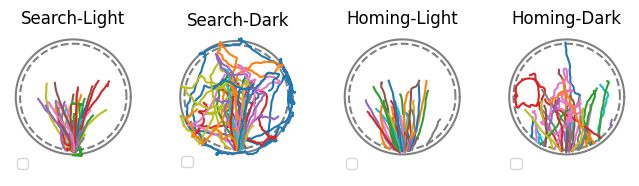

In [8]:
col=4
row=1
sizePerPlot=2.0
fig = plt.figure(figsize=(col*sizePerPlot,row*sizePerPlot))
gs = gridspec.GridSpec(row,col,
                       wspace=0.3, hspace=0.3) #

# to plot the arena circle
arena=np.arange(start=0,stop=2*np.pi,step=0.02)
arenaRadiusProportionToPeri=0.925
arenaRadius = 40

myD = {"light":["light","dark","light","dark"],
       "var" : ["searchArenaNoLever","searchArenaNoLever","homingPeriNoLever","homingPeriNoLever"],
       "title" : ["Search-Light","Search-Dark","Homing-Light","Homing-Dark"]}

#########################################
## path examples
##########################################
# show the paths on the arena

for i in range(4):
    ax = plt.subplot(gs[0,i])
    ax.set_aspect('equal', adjustable='box')
    ax.plot(np.cos(arena)*arenaRadius,np.sin(arena)*arenaRadius,color="gray")
    ax.plot(np.cos(arena)*arenaRadius*arenaRadiusProportionToPeri,np.sin(arena)*arenaRadius*arenaRadiusProportionToPeri,color="gray",linestyle='dashed')
    ax.set_xlabel("cm")
    ax.set_ylabel("cm")
    ax.set_ylim(-55,45)
    ax.xaxis.set_label_coords(0.5, -0.14)
    ax.yaxis.set_label_coords(-0.14, 0.5)
    leg = ax.legend(loc=3,handlelength=1)
    ax.set_xticks(np.arange(-40,80,40))
    ax.set_yticks(np.arange(-40,80,40))
    ax.tick_params(axis='both', which='major', pad=3)
    ax.set_title(myD["title"][i])
    ax.axis('off')
    trials = [t for t in ses.trialList if t.light==myD["light"][i] and t.valid]
    for t in trials:
        if t.pathD[myD["var"][i]].pPose is not None:
            ax.plot(t.pathD[myD["var"][i]].pPose[:,0],t.pathD[myD["var"][i]].pPose[:,1])
 

searchArenaNoLever_duration:
Light trials 0.5726209053626428
Dark trials 1.374144251529987
searchArenaNoLever_length:
Light trials 33.942525020377396
Dark trials 41.45579042510913
searchArenaNoLever_meanSpeed:
Light trials 61.90944347585757
Dark trials 31.45377648729827
searchArenaNoLever_complexity:
Light trials 0.7188343774242199
Dark trials 2.0413384603544356
homingPeriNoLever_duration:
Light trials 0.4776094601704524
Dark trials 1.0497483473557692
homingPeriNoLever_length:
Light trials 31.06743968275288
Dark trials 36.0927653130554
homingPeriNoLever_meanSpeed:
Light trials 67.90247370585838
Dark trials 32.95041316705563
homingPeriNoLever_complexity:
Light trials 0.5542717496273576
Dark trials 1.6056645829212752


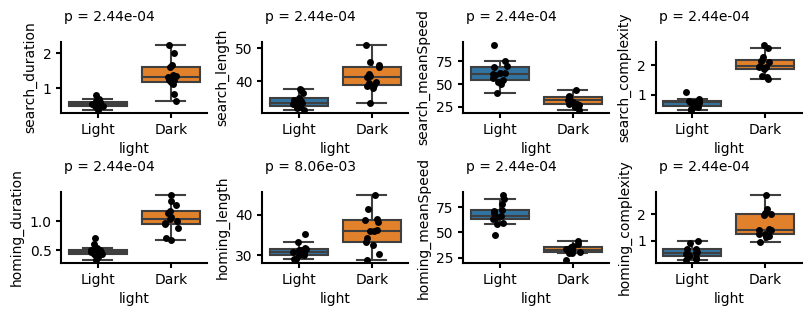

In [9]:
#####################
### Panel b and c
#####################

from scipy.stats import wilcoxon
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df2 = df.groupby(['subject', 'light'], as_index=False).median()

def set_figure_font_sizes():
    plt.rc('axes', labelsize=10)
    plt.rc('axes', titlesize=10)

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(8,3), constrained_layout=True)

axes = axes.flatten()
fontsize = 10

ylabels=['search_duration','search_length','search_meanSpeed','search_complexity',
         'homing_duration','homing_length','homing_meanSpeed','homing_complexity']

for i, (ax, feature,ylab) in enumerate(zip(axes, ['searchArenaNoLever_duration', 'searchArenaNoLever_length',
                                             'searchArenaNoLever_meanSpeed', 'searchArenaNoLever_complexity',
                                             'homingPeriNoLever_duration', 'homingPeriNoLever_length',
                                             'homingPeriNoLever_meanSpeed', 'homingPeriNoLever_complexity'],ylabels)):
    ax.grid(False)
    ax = sns.boxplot(x="light", y=feature, data=df2, dodge=False, showfliers=False, order=["light", "dark"], ax=ax)
    ax = sns.stripplot(y=feature, x="light", data=df2, color="black", order=["light", "dark"], ax=ax)
    ax.set_ylabel(feature, fontsize=fontsize)
    ax.set_xticklabels(['Light', 'Dark'], fontsize=fontsize)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_linewidth(1.5)
    ax.spines['bottom'].set_linewidth(1.5)
    ax.xaxis.set_tick_params(width=1.5)
    ax.yaxis.set_tick_params(width=1.5)
    ax.set_ylabel(ylab, fontsize= fontsize)

    stat, p_value = wilcoxon(x=df2[feature][df2.light == "light"], y=df2[feature][df2.light == "dark"])
    ax.text(0.02, 1.3, "p = {:.02e}".format(p_value), transform=ax.transAxes, fontsize=fontsize)
    print(f"{feature}:")
    print("Light trials {}".format(np.nanmean(df2[feature][df2.light == "light"])))
    print("Dark trials {}".format(np.nanmean(df2[feature][df2.light == "dark"])))

plt.show()

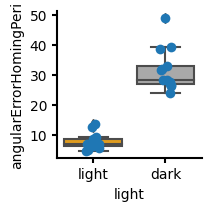

In [10]:
################
## panel d 
#################
dfError= df[['searchArenaNoLever_duration','searchArenaNoLever_length','angularErrorHomingPeri','subject','light']]
dfmouse=dfError.groupby(['subject','light']).mean().reset_index()

fig= plt.figure(figsize=(2,2), constrained_layout=True)
ax= fig.gca()
# Define the color palette
colors = ['orange', 'darkgray'] ### corespond to light and dark

sns.boxplot(data=dfmouse, y="angularErrorHomingPeri", x='light', order=['light','dark'], palette=colors)
sns.stripplot(data=dfmouse, y="angularErrorHomingPeri", x='light', size=7,order=['light','dark'])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5)
ax.xaxis.set_tick_params(width=1.5)
ax.yaxis.set_tick_params(width=1.5)

In [11]:
def error_per_group(g, pred,short):
    err= g[d["var"]][g['grouping'+'_'+pred]==short]
    return  np.median(err)
    

In [12]:
dfDark= df[df.light=="dark"]

df2=dfDark[['searchArenaNoLever_duration','searchArenaNoLever_length','angularErrorHomingPeri','sessionName']]
df2['mouse']= [df2['sessionName'].iloc[r].split('-')[0] for r in range(df2.shape[0])]

df3= df2.groupby(['sessionName']).median().reset_index()
df3['mouse']= [df3['sessionName'].iloc[r].split('-')[0] for r in range(df3.shape[0])]

df4=df3.groupby(['mouse']).median().reset_index()


the p value for the searchArenaNoLever_length is this: 1.0 0.00048828125
the p value for the searchArenaNoLever_duration is this: 0.0 0.000244140625


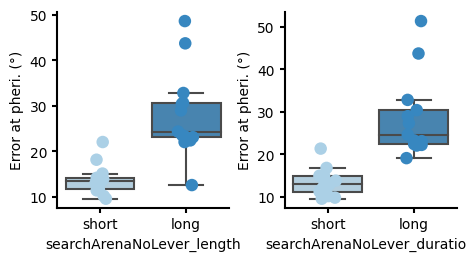

In [13]:
#########################
### Panel e and f 
########################

d = {"var": ["angularErrorHomingPeri"],
     "varNames" : ["Error at peri. (degree)"],
     "predictors" : ["searchArenaNoLever_length","searchArenaNoLever_duration"],
     "predictorNames" : [ "Length (cm)", "Duration (cm)"],
     "yCoord" : [-0.18,-0.18,-0.18,-0.18],
    "pValueX": [0.03,0.03,0.03,0.03] ,
    "xLabels": [["Short","Long"],["Short","Long"]]}
my_pal2 = {"short": sns.color_palette()[0], "long": "grey"}

col=2
row=1    
sizePerRow, sizePerCol = (2.5,4)

fig = plt.figure(figsize=(col*sizePerCol,row*sizePerRow),constrained_layout=True) 
gs = gridspec.GridSpec(1, 4, figure=fig)

for i,pred in enumerate(d["predictors"]):
    ax = plt.subplot(gs[i])
    ax.grid(False)
    df2['grouping'+'_'+pred]= 0
    ## loop through trials
    for j,p in enumerate(df2[pred]):
        
        mouse= df2['mouse'].iloc[j]
        ind= np.where(df4['mouse']==mouse)[0]
        pmouse= df4.iloc[ind][pred]
        df2['grouping'+'_'+pred].iloc[j]= p< pmouse
    
    dfmouseD= df2.groupby(['mouse']).apply(lambda x:pd.Series({'error_short': error_per_group(x,pred,True),'error_long': error_per_group(x,pred,False)})).reset_index()
    stat,p_value = wilcoxon(x=dfmouseD['error_short'], y =dfmouseD['error_long'] )
    print('the p value for the',pred, 'is this:', stat,p_value)
    sns.boxplot(dfmouseD,showfliers=False, palette='Blues')
    sns.stripplot(dfmouseD, palette="Blues", size=9)
    ax.set_xlabel(pred)
    ax.set_ylabel('Error at pheri. (°)')
    ax.xaxis.set_tick_params(width=1.5)
    ax.yaxis.set_tick_params(width=1.5)
    ax.set_xticklabels(['short','long'], fontsize= 10)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_linewidth(1.5)
    ax.spines['bottom'].set_linewidth(1.5)


In [14]:
##################
## panel g
################
df["logLength"] = np.log(df["searchArenaNoLever_length"])
df["logDuration"] = np.log(df["searchArenaNoLever_duration"])
df["logErrorPeri"] = np.log(df["angularErrorHomingPeri"])

from scipy.stats import pearsonr
def get_correlation_n(dfOne, var2="logLength"):

    r,p = pearsonr(dfOne["logErrorPeri"],dfOne[var2])
    n = dfOne.shape[0]
    return pd.DataFrame({"var":[var2],
                        "r":[r],
                        "n": [n],
                        "p": [p]})

dfSel = df[["subject","light","logErrorPeri","logLength","logDuration"]].dropna() ## only select some variables
dfRes1 = dfSel.groupby(["subject","light"]).apply(get_correlation_n,"logLength").reset_index()
dfRes2 = dfSel.groupby(["subject","light"]).apply(get_correlation_n,"logDuration").reset_index()
dfRes = pd.concat([dfRes1,dfRes2])
dfRes = dfRes[["subject","light","var","r","n","p"]]

Text(0.02, 1.4, 'Pvalue: 0.000244140625')

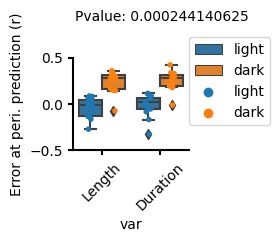

In [15]:
col = 1
row = 1
sizePerCol = 1.5
sizePerRow = 1.2
fig = plt.figure(figsize=(col * sizePerCol, row * sizePerRow))
gs = gridspec.GridSpec(row, col)

ax = fig.add_subplot(gs[0])
x_labels = ['Length', 'Duration']

sns.boxplot(data=dfRes, x="var", hue="light", y="r", hue_order=['light', 'dark'], ax=ax)
sns.stripplot(data=dfRes, x="var", hue="light", y="r", size=4, dodge=True, hue_order=['light', 'dark'], ax=ax)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5)
ax.xaxis.set_tick_params(width=1.5)
ax.yaxis.set_tick_params(width=1.5)
ax.set_xticklabels(x_labels, rotation=45, fontsize=10)
ax.set_ylabel('Error at peri. prediction (r)', fontsize=10)
ax.set_ylim(ymin=-0.5, ymax=0.5)
ax.legend(loc=[1, 0.27])

stats, p_value = wilcoxon(dfmouse.angularErrorHomingPeri[dfmouse.light == 'light'], dfmouse.angularErrorHomingPeri[dfmouse.light == 'dark'])
ax.text(0.02, 1.4, f'Pvalue: {p_value}', transform=ax.transAxes, fontsize=10)

## Extended data Fig.4a,b

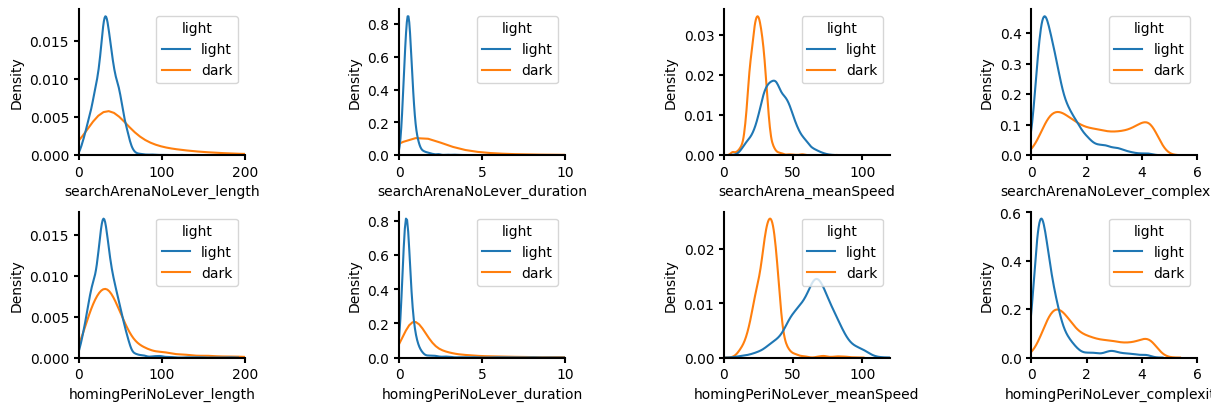

In [15]:
############
## panel a and b
###############
col=4
row=2     
sizePerRow, sizePerCol = 2,3
fig  = plt.figure(figsize=(col*sizePerCol,row*sizePerRow),constrained_layout=True) 
gs = gridspec.GridSpec(row, col, figure=fig, wspace=0.3)

xvars= ['searchArenaNoLever_length','searchArenaNoLever_duration','searchArena_meanSpeed','searchArenaNoLever_complexity',
        'homingPeriNoLever_length','homingPeriNoLever_duration','homingPeriNoLever_meanSpeed','homingPeriNoLever_complexity']
xlims = [(0, 200), (0, 10), (0, 120), (0, 6), (0, 200), (0, 10), (0, 120), (0, 6)]
xlabs=['length','Duration']
subplots = [fig.add_subplot(gs[r, c]) for r in range(row) for c in range(col)]

for ax, v,xl in zip(subplots, xvars,xlims):
    sns.kdeplot(df, x=v, hue='light', ax=ax)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_linewidth(1.5)
    ax.spines['bottom'].set_linewidth(1.5)
    ax.xaxis.set_tick_params(width=1.5)
    ax.yaxis.set_tick_params(width=1.5)
    ax.set_xlim(xl)


## ExtendedDataFig4.d

mean error at peri
light: 7.442308927657591
dark: 30.066731674678728
median error at peri
light: 4.256644996034638
dark: 18.147858142760622
Wilcoxon test against 90 degree
WilcoxonResult(statistic=68330.0, pvalue=1.3742336607970736e-289)


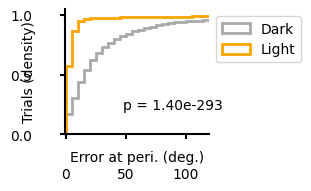

In [16]:
#####################
###  panel d 
######################
from scipy.stats import mannwhitneyu
from scipy.stats import wilcoxon
col=3
row=1     
sizePerRow, sizePerCol = 1.8,2
fig  = plt.figure(figsize=(col*sizePerCol,row*sizePerRow),constrained_layout=True) 
gs = gridspec.GridSpec(row, col, figure=fig, wspace=0.15)

valD = df["angularErrorHomingPeri"][df.light=="dark"]
valL = df["angularErrorHomingPeri"][df.light=="light"]

ax= fig.add_subplot(gs[0])

ax.hist(valD, 
        bins = np.arange(0,180,5),cumulative=True, density = True,histtype='step',alpha=1.0,lw=2,
        color=colors[1],label="Dark")

ax.hist(valL, 
        bins = np.arange(0,180,5),cumulative=True, density = True,histtype='step',alpha=1.0,lw=2,
        color=colors[0], label="Light")

stat,p_value = mannwhitneyu(x=valL, y =valD )
ax.text(0.4,0.2,"p = {:.02e}".format(p_value),transform=ax.transAxes)
print("mean error at peri")
print("light: {}".format(np.nanmean(valL)))
print("dark: {}".format(np.nanmean(valD)))
print("median error at peri")
print("light: {}".format(np.nanmedian(valL)))
print("dark: {}".format(np.nanmedian(valD)))
ax.set_xlim(-1,120)

ax.set_xlabel("Error at peri. (deg.)", labelpad=10)
ax.tick_params(axis='x', which='major', pad=20)

ax.set_ylabel("Trials (density)")
ax.tick_params(axis='y', which='major', pad=20)
#ax.tick_params(axis='both', which='major', pad=3)
ax.xaxis.set_label_coords(0.5, -0.13)
ax.yaxis.set_label_coords(-0.1975, 0.5)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5)
ax.xaxis.set_tick_params(width=1.5)
ax.yaxis.set_tick_params(width=1.5)
ax.legend(loc="upper right")
ax.legend(loc='upper left',  bbox_to_anchor=(1, 1)) 
print("Wilcoxon test against 90 degree")
print(wilcoxon(valD-90))



## ExtendeddataFig3.e 

# Predictors

Now that we have homing accuracy measures that are almost normally distributed, we can have a look at the variables we would like to use as predictors.

An obvious candidate is the searching path until the lever was pressed. This is the path called "searchArena"


In [17]:
# remove invalid trials
boolIndices = df.valid
print("Number of valid trials: {}".format(sum(boolIndices)))

df = df[boolIndices]

### get the log values
df["logAngularErrorHomingPeri"] = np.log1p(df["angularErrorHomingPeri"])
df["homingPeriNoLever_logMedianMVDeviationToTarget"] = np.log1p(df["homingPeriNoLever_medianMVDeviationToTarget"])

d = {"variable" : ["logAngularErrorHomingPeri","homingPeriNoLever_logMedianMVDeviationToTarget"], 
    "xMin" : [-1,-1],
     "xMax" : [6,6],
     "xStep" : [0.2,0.2],
     "xTicksStep" : [1,1],
     "xLabel": ["Error at periphery (log1p(deg))", 
                "Homing heading error (log1p(deg))"]}
lc = ["light","dark"]


df1 = df.filter(regex=("searchArena_+")) # our predictor
df1 = pd.concat([df[["logAngularErrorHomingPeri",
                     "timeLever","homingPeriNoLever_logMedianMVDeviationToTarget","light"]],df1],axis=1) 
# add our predited values to get rid of some trials


df1 = df1.dropna() # get rid of invalid values
oldName = df1.columns
df1 = df1.rename(columns = {"logAngularErrorHomingPeri": "logErrorPeri",
                            "AngularErrorHomingPeri": "errorPeri",
                            "homingPeriNoLever_logMedianMVDeviationToTarget" : "logHeadingError"})

df1.columns = df1.columns.str.lstrip("searchArena_")

df1 = df1[df1.columns.drop(list(df1.filter(regex='Angular')))]
df1["logLength"] = np.log(df1["length"])
df1["logDuration"] = np.log(df1["duration"])
df1["logTimeLever"] = np.log(df1["timeLever"])

#drop the original length
df1 = df1.drop(["length","duration","timeLever"],axis=1)


Number of valid trials: 4453


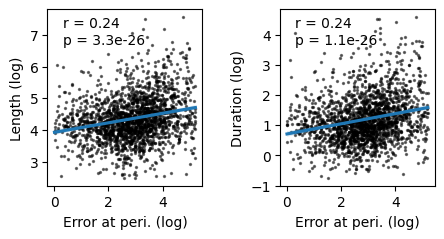

In [18]:
sizePerCol=4
sizePerrow=2.3
fig = plt.figure(figsize=(2*sizePerCol,1*sizePerrow))
gs = gridspec.GridSpec(row,col,wspace=0.5, hspace=0.32) #

d = {"var": ["logErrorPeri"],
     "varNames" : ["Error at peri. (log)"],
     "predictors" : ["logLength", "logDuration"],
     "predictorNames" : [ "Length (log)", "Duration (log)"],
    "yCoord" : [-0.11,-0.11,-0.11,-0.18]}

for i, pred in enumerate(d["predictors"]):
    ax = plt.subplot(gs[0,i])
    ax = sns.regplot(y=pred, x=d["var"][0], data=df1[df1.light=="dark"],
                     scatter_kws={"color": "black",'s':2, 'alpha':0.5}, line_kws={"color": sns.color_palette()[0]})
    ax.tick_params(axis='both', which='major', pad=3)
    ax.set_ylabel(d["predictorNames"][i])
    ax.set_xlabel(d["varNames"][0])
    #
    r,p = pearsonr(df1[d["var"][0]][df1.light=="dark"],
                   df1[pred][df1.light=="dark"])
    ax.text(0.1,0.9, "r = {:.2}".format(r), transform = ax.transAxes)
    ax.text(0.1,0.8, "p = {:.2}".format(p), transform = ax.transAxes)
